In [15]:
import pandas as pd
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import time
import matplotlib.pyplot as plt

In [20]:
import numpy as np
import random
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, cross_val_score

params = {'gamma': 10,
 'learning_rate': 0.01,
 'max_depth': 6,
 'min_child_weight': 5,
 'n_estimators': 200,
 'subsample': 0.5}
year = 2010
years = [2010+i for i in range(8)]
baseline = [0.5588477366255145, 0.5253190613421161, 0.5329218106995884, 0.5376388317564789, 0.5300411522633744, 0.541786743515850,
            0.5300658978583196, 0.5395061728395062]

accuracies = []
confusions = []
features = []
num_models = 20
for i in range(8):
    # Read in dataset
    df = pd.read_csv('Rolling Average Stats/' + str(year) +'.csv')

    # Create observation and labels
    X = df.drop(['date', 'home_team', 'away_team', 'home_score', 'away_score', 'home_pitcher', 'away_pitcher','homeLine','awayLine'], 1)
    y = df.home_score > df.away_score # 1 if home team wins, 0 otherwise
    # Use 1st 2/3rds of season for training, test on last 1/3
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=False)
    pred_avg = np.zeros(len(y_test))
    features = []

    for i in random.sample(range(1, 1000000), num_models): #[30, 595, 123, 4849, 3, 1010, 234, 8267, 3736, 99999]:
        clfi =  XGBClassifier(**params, silent=False, seed=i)
        clfi.fit(X_train, y_train.values.ravel())
        clfi_pred = clfi.predict(X_test) 
        pred_avg = pred_avg + (1/num_models)*clfi_pred
        features.append(clfi)

    pred_avg = np.round(pred_avg)
    # Report mean error rate
    accuracy = accuracy_score(y_test, pred_avg)
    error_rate = 1 - accuracy
    print('Year: ', year)
    print("Mean error rate: {}\nAccuracy: {}".format(error_rate, accuracy))
    accuracies.append(accuracy)

    # Report confusion matrix for each classifier
    confusion = confusion_matrix(y_test, pred_avg)
    print("Confusion matrix for XGBoost: \n{}\n".format(confusion))
    confusions.append(confusion)
    year += 1


Year:  2010
Mean error rate: 0.45299145299145294
Accuracy: 0.5470085470085471
Confusion matrix for XGBoost: 
[[ 53 264]
 [ 54 331]]

Year:  2011
Mean error rate: 0.4685714285714285
Accuracy: 0.5314285714285715
Confusion matrix for XGBoost: 
[[121 205]
 [123 251]]

Year:  2012
Mean error rate: 0.45014245014245013
Accuracy: 0.5498575498575499
Confusion matrix for XGBoost: 
[[ 90 227]
 [ 89 296]]

Year:  2013
Mean error rate: 0.4322396576319544
Accuracy: 0.5677603423680456
Confusion matrix for XGBoost: 
[[ 92 242]
 [ 61 306]]

Year:  2014
Mean error rate: 0.4714285714285714
Accuracy: 0.5285714285714286
Confusion matrix for XGBoost: 
[[141 169]
 [161 229]]

Year:  2015
Mean error rate: 0.4821683309557775
Accuracy: 0.5178316690442225
Confusion matrix for XGBoost: 
[[ 61 281]
 [ 57 302]]

Year:  2016
Mean error rate: 0.46208869814020026
Accuracy: 0.5379113018597997
Confusion matrix for XGBoost: 
[[ 85 250]
 [ 73 291]]

Year:  2017
Mean error rate: 0.41512125534950073
Accuracy: 0.584878744650

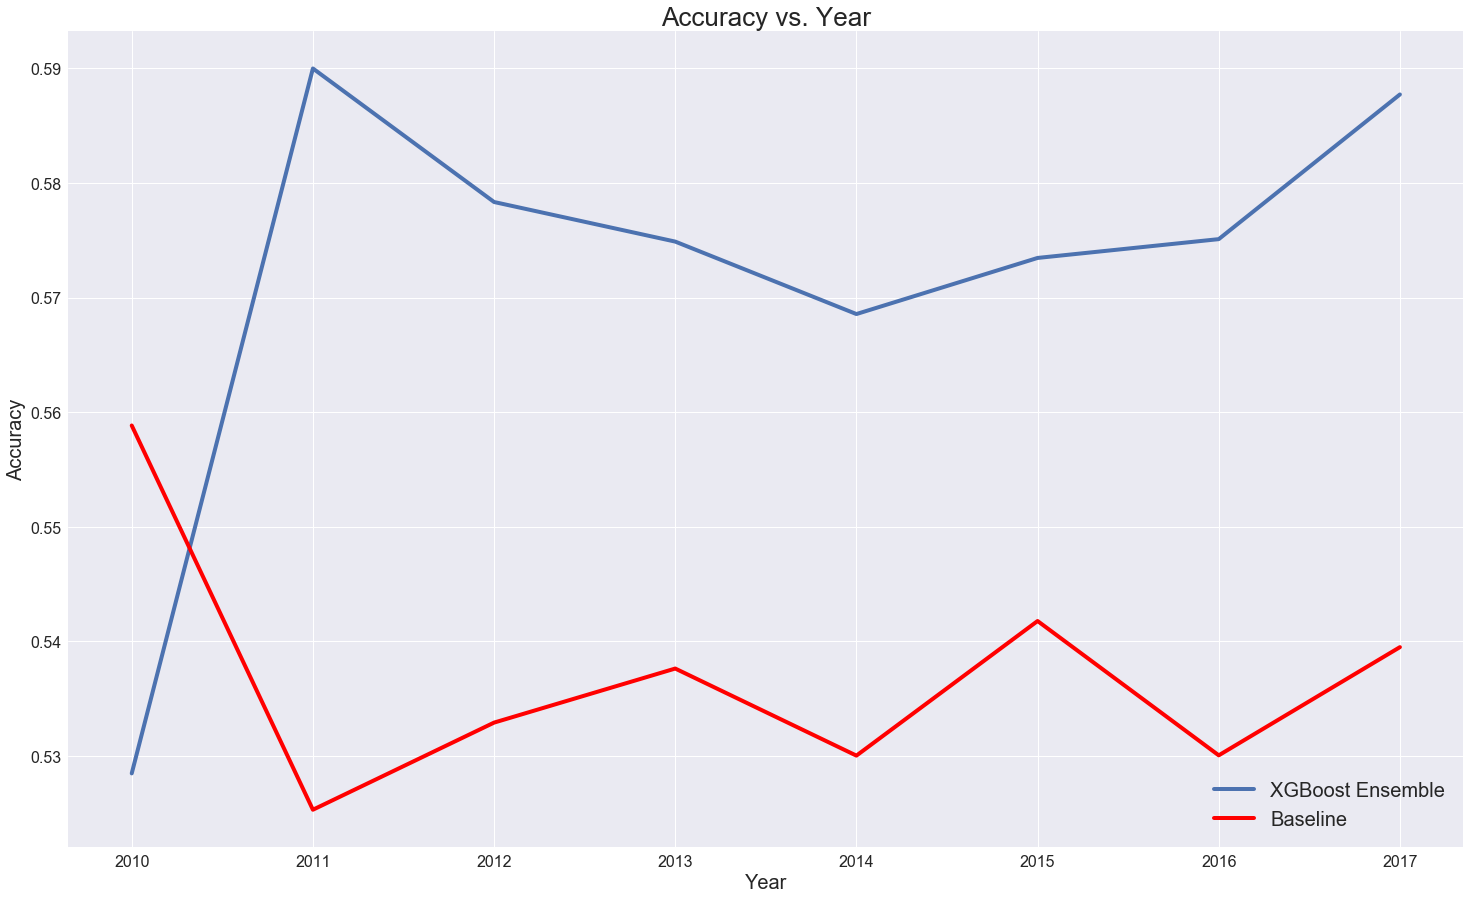

In [48]:
import seaborn as sns
sns.set()
plt.figure(figsize=(25, 15))
plt.plot(years, accuracies, label='XGBoost Ensemble', linewidth=4)
plt.plot(years, baseline, color='red', label='Baseline', linewidth=4)
plt.title('Accuracy vs. Year',fontsize=26)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize=16)
plt.legend(fontsize=20)
plt.show()

In [ ]:
sns.set()
plt.figure(figsize=(25, 15))
plt.plot(years, accuracies, label='XGBoost Ensemble', linewidth=4)
plt.plot(years, baseline, color='red', label='Baseline', linewidth=4)
plt.title('Accuracy vs. Year',fontsize=26)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize=16)
plt.legend(fontsize=20)
plt.show()

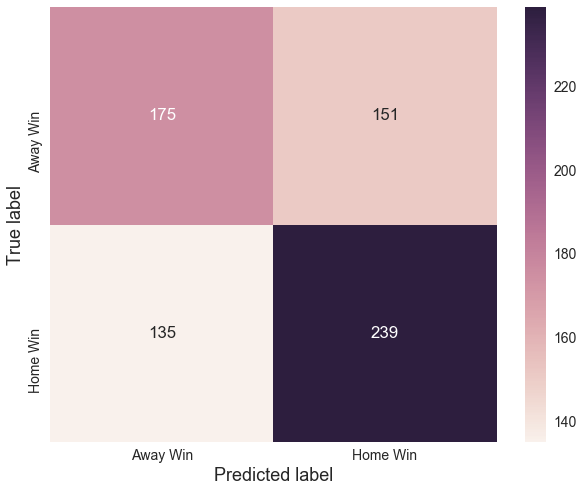

In [46]:
df_cm = pd.DataFrame(confusions[1], columns=['Away Win', 'Home Win'], index=['Away Win', 'Home Win'])
plt.figure(figsize=(10,8))
sns.set(font_scale=1.4)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
plt.ylabel('True label', fontsize=18)
plt.xlabel('Predicted label', fontsize=18)
plt.show()

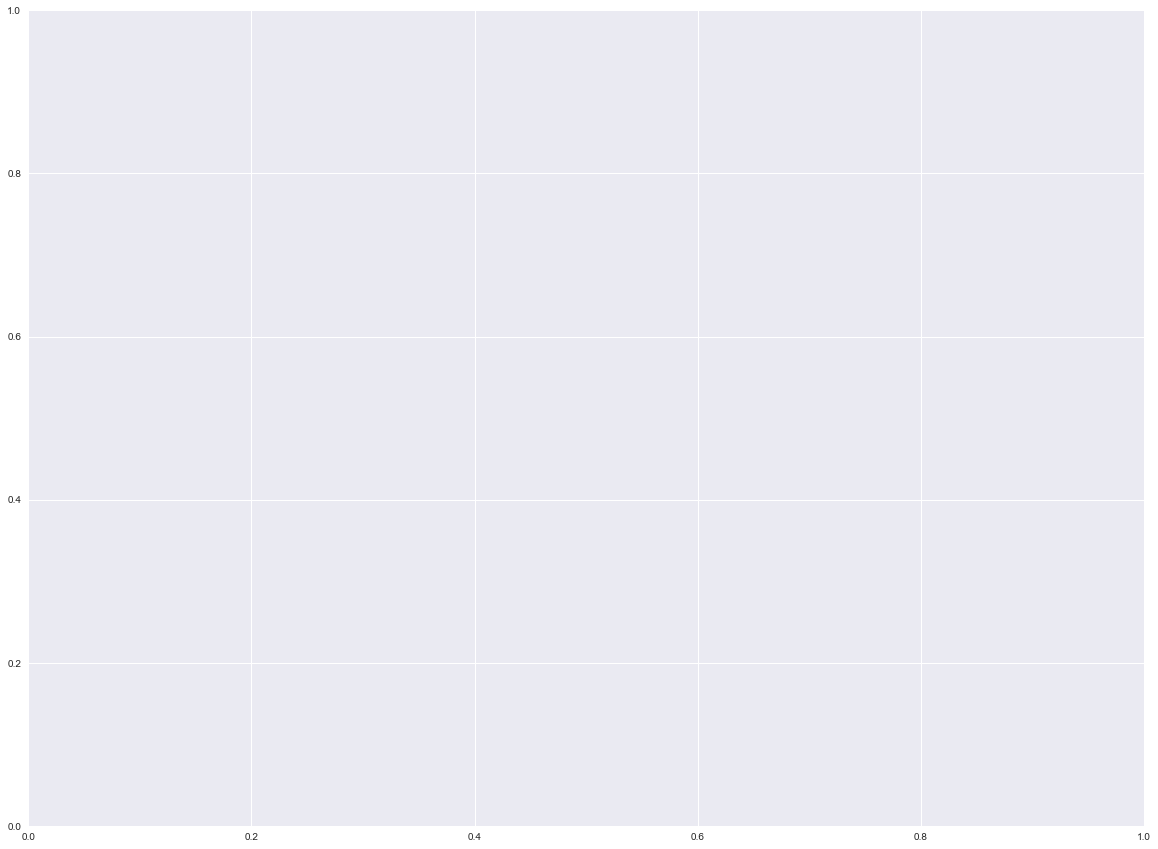

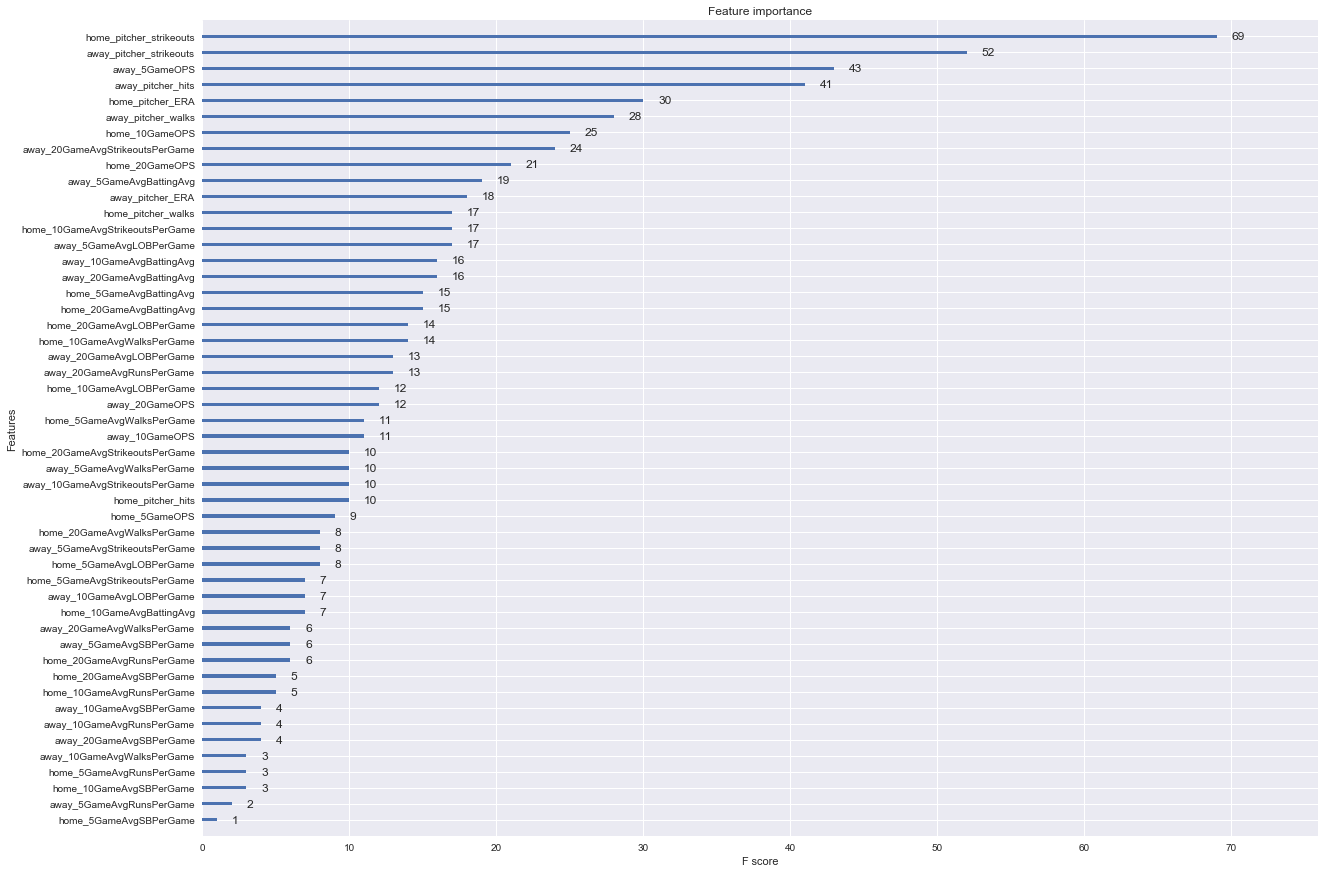

In [66]:
from xgboost import plot_importance
fig, ax = plt.subplots(1,1,figsize=(20,15))
plot_importance(features[8], ax=ax)
plt.show()